In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data-20y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
1,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China
2,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,None,China
3,4639,Ao Changrong,M,25.0,173.0,71.0,China,CHN,2008,Summer,Beijing,Hockey,Hockey Men's Hockey,None,China
4,6376,Ba Dexin,M,23.0,185.0,80.0,China,CHN,2014,Winter,Sochi,Curling,Curling Men's Curling,None,China


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49399 entries, 0 to 49398
Data columns (total 15 columns):
ID        49399 non-null int64
Name      49399 non-null object
Sex       49399 non-null object
Age       49399 non-null float64
Height    49399 non-null float64
Weight    49399 non-null float64
Team      49399 non-null object
NOC       49399 non-null object
Year      49399 non-null int64
Season    49399 non-null object
City      49399 non-null object
Sport     49399 non-null object
Event     49399 non-null object
Medal     49399 non-null object
Region    49399 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 5.7+ MB


In [4]:
df = df.loc[:, ['Sex', 'Age', 'Height', 'Weight', 'Team', 'Sport', 'Medal']]
print(df.shape)
x = df[df.columns[:-1]].values
y = df['Medal'].values

le_indices = [0, 4, 5]

le = []
for i in range(len(le_indices)):
    le.append(LabelEncoder())
    le[i].fit(x[:,le_indices[i]])
    x[:,le_indices[i]] = le[i].transform(x[:,le_indices[i]])

std = StandardScaler()
x_std = std.fit_transform(x)

classes = np.unique(y)

ley = LabelEncoder()   
y = ley.fit_transform(y)

print(x_std[:10])
print(y[:10])

ley_name_mapping = dict(zip(classes, ley.transform(classes)))
print(ley_name_mapping)

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

(49399, 7)
[[ 8.83548237e-01 -5.41633996e-01 -5.36952000e-01 -7.27638710e-01
  -1.03393110e+00  2.04266259e-01]
 [-1.13180012e+00 -2.17247262e+00 -7.18761771e-01 -1.12091655e+00
  -1.03393110e+00  1.17628716e+00]
 [-1.13180012e+00 -2.17247262e+00 -7.18761771e-01 -1.12091655e+00
  -1.03393110e+00  1.17628716e+00]
 [ 8.83548237e-01 -1.79225413e-01 -2.64237343e-01 -6.62933586e-03
  -1.03393110e+00  7.46634728e-02]
 [ 8.83548237e-01 -5.41633996e-01  8.26621284e-01  5.83287425e-01
  -1.03393110e+00 -6.38151852e-01]
 [-1.13180012e+00 -1.26645116e+00 -1.08238131e+00 -7.93185017e-01
  -1.03393110e+00  1.17628716e+00]
 [ 8.83548237e-01  1.97887926e-03 -2.64237343e-01 -3.34360870e-01
  -1.03393110e+00  1.56509551e+00]
 [ 8.83548237e-01  7.26796047e-01 -2.64237343e-01 -3.34360870e-01
  -1.03393110e+00  1.56509551e+00]
 [ 8.83548237e-01 -1.26645116e+00 -2.64237343e-01 -7.21756426e-02
  -1.03393110e+00  1.11148576e+00]
 [-1.13180012e+00 -1.26645116e+00 -9.91476427e-01 -1.18646286e+00
  -1.03393110e

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
df = pd.DataFrame(x_std, columns=['Sex', 'Age', 'Height', 'Weight', 'Team', 'Sport'])
df['Medal'] = y
df.head()

,Sex,Age,Height,Weight,Team,Sport,Medal
0,0.883548,-0.541634,-0.536952,-0.727639,-1.033931,0.204266,2
1,-1.131800,-2.172473,-0.718762,-1.120917,-1.033931,1.176287,2
2,-1.131800,-2.172473,-0.718762,-1.120917,-1.033931,1.176287,2
3,0.883548,-0.179225,-0.264237,-0.006629,-1.033931,0.074663,2
4,0.883548,-0.541634,0.826621,0.583287,-1.033931,-0.638152,2


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


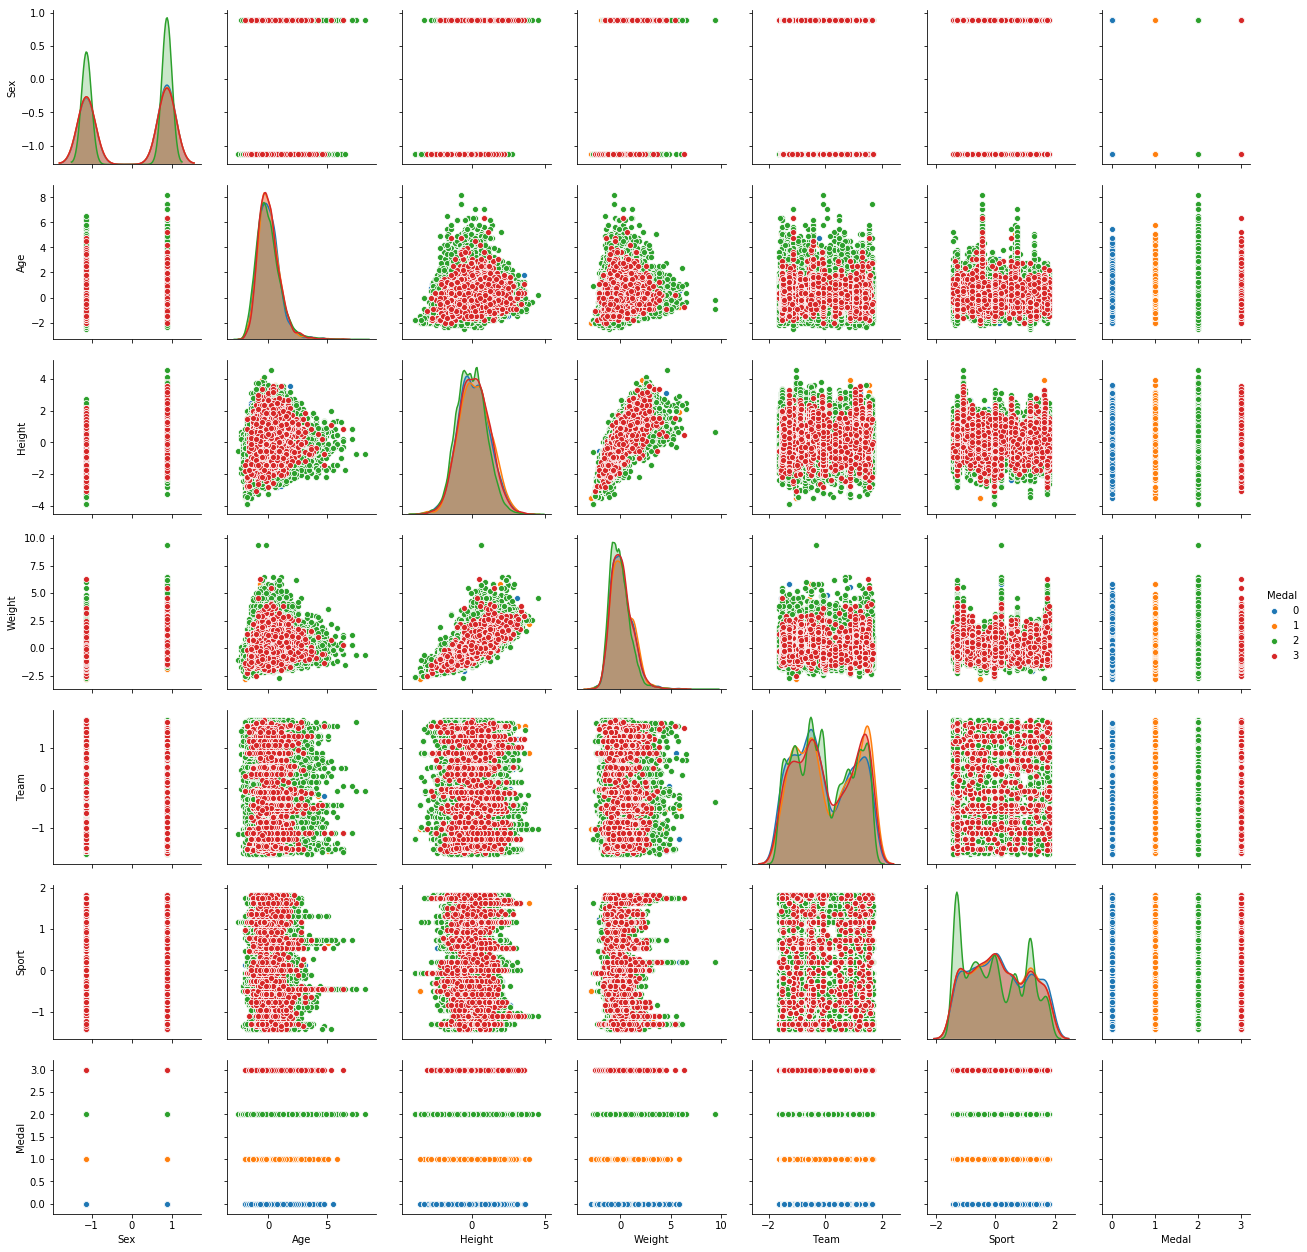

In [6]:
sb.pairplot(df, hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


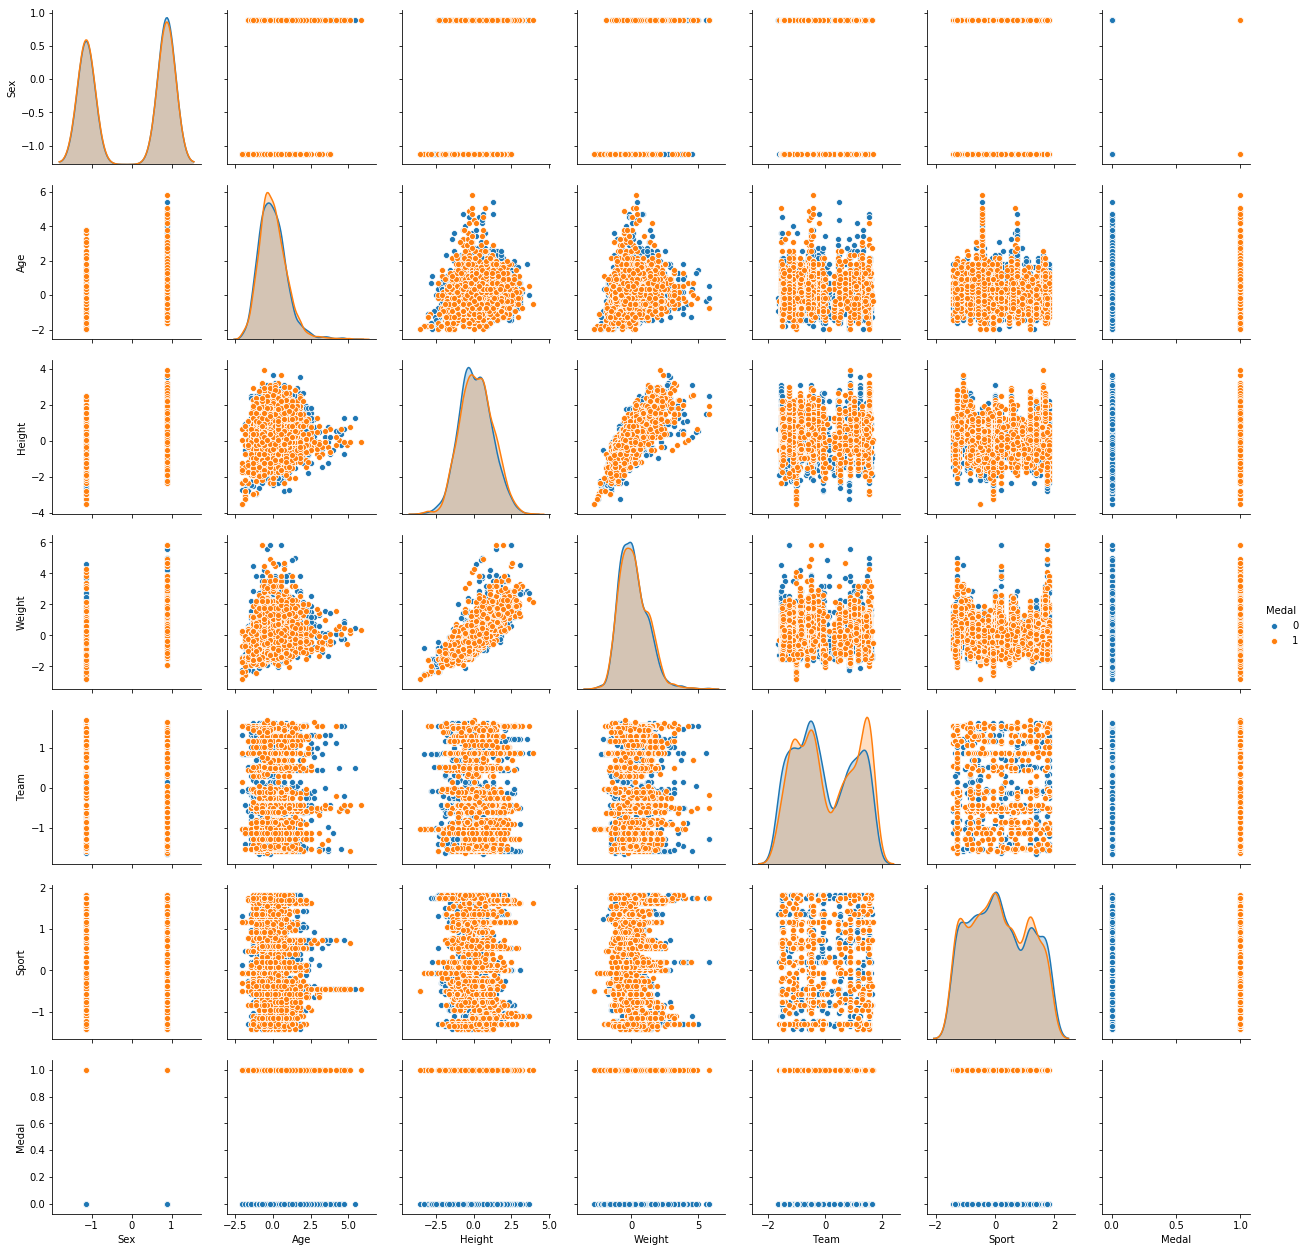

In [7]:
sb.pairplot(df.loc[~df.Medal.isin([2,3])], hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


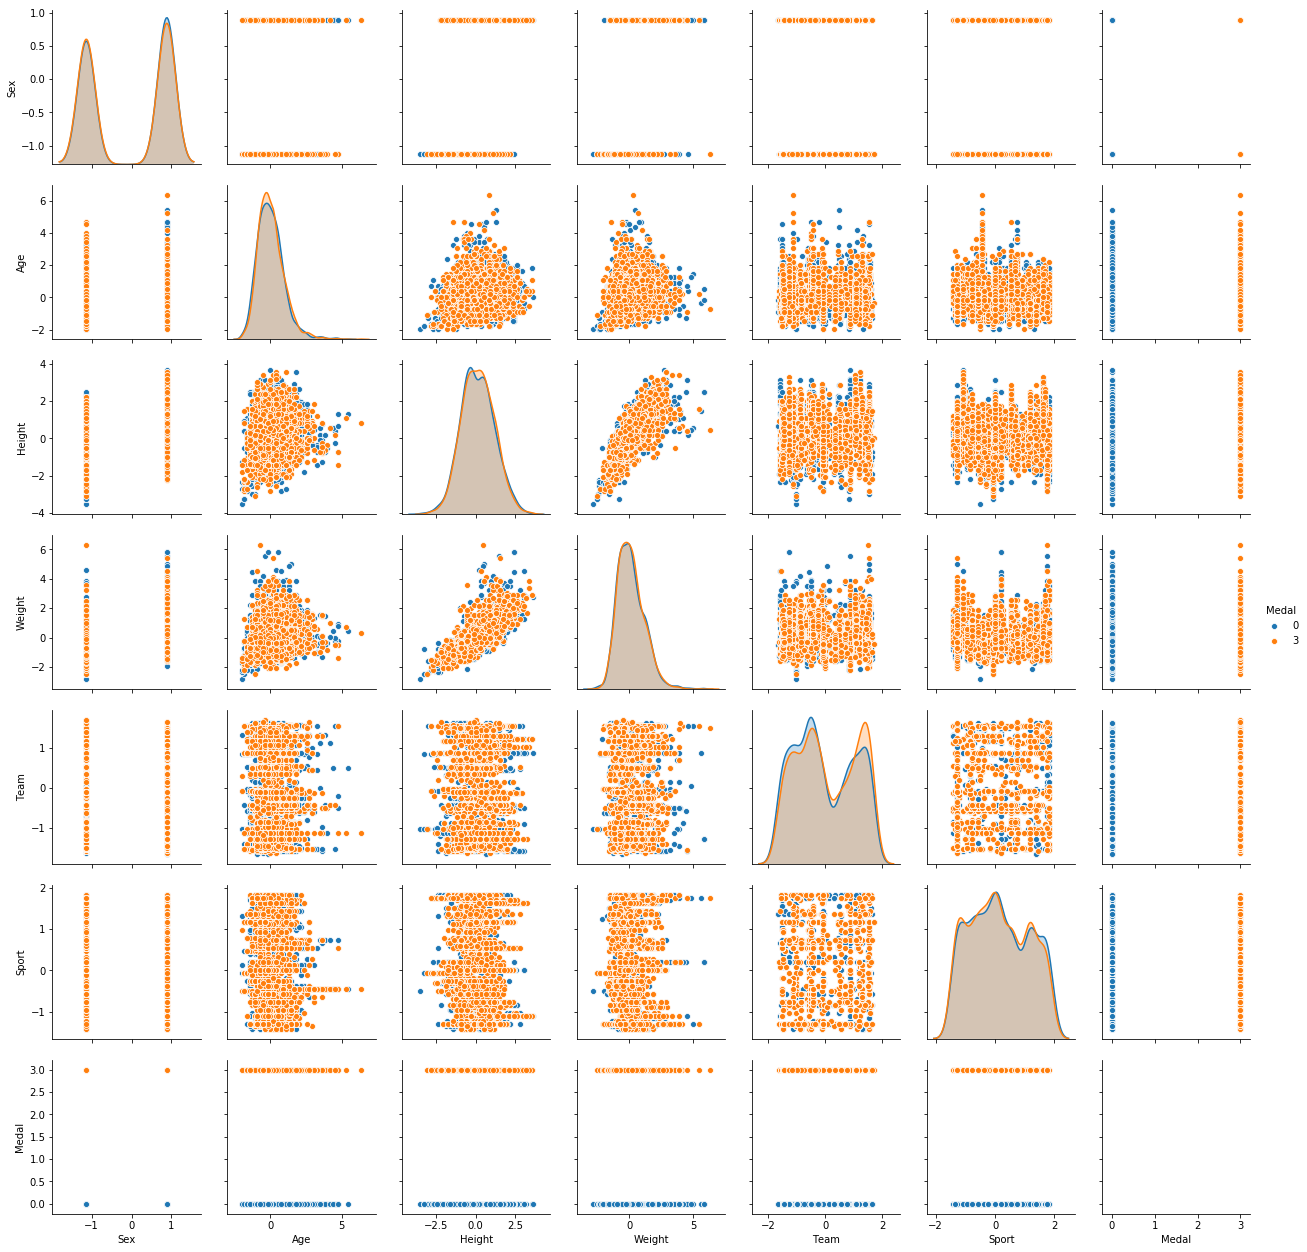

In [8]:
sb.pairplot(df.loc[~df.Medal.isin([2,1])], hue='Medal')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


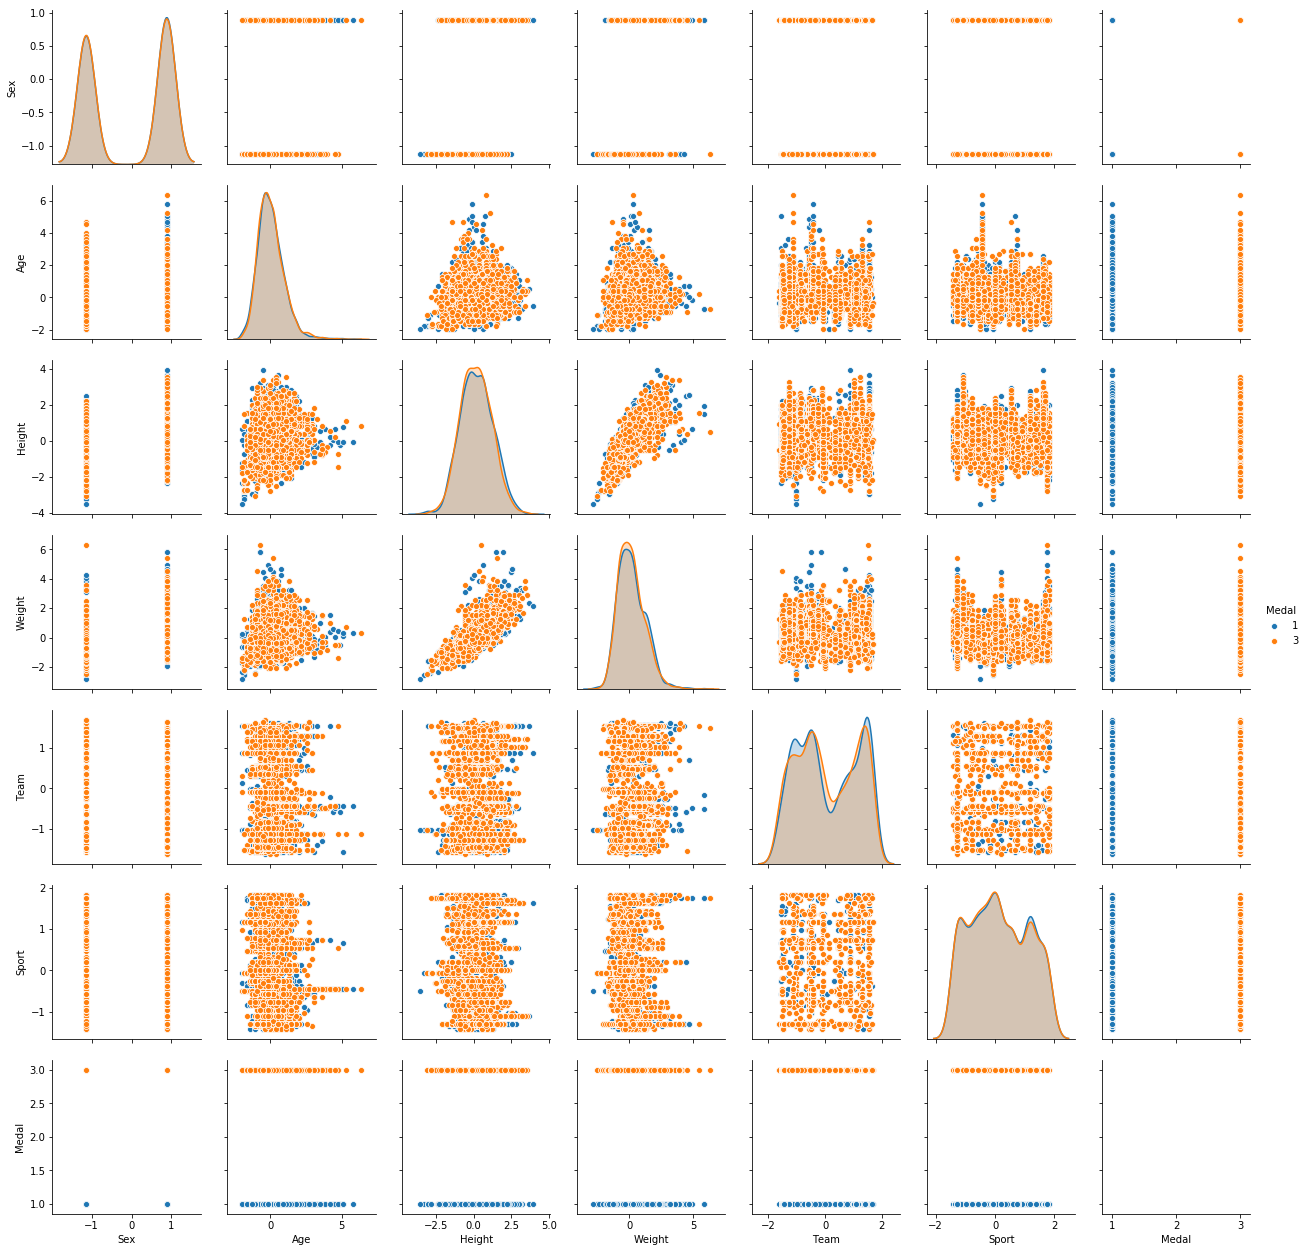

In [9]:
sb.pairplot(df.loc[~df.Medal.isin([2,0])], hue='Medal')

In [10]:
df_temp = df.loc[~df.Medal.isin([2,3])]

x = df_temp[['Sport', 'Team']].values
y = df_temp['Medal'].values

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[[-1.22136439 -1.02317042]
 [ 1.75949969 -1.0339311 ]
 [-0.50854907 -1.0339311 ]
 [-0.50854907 -1.0339311 ]
 [-0.50854907 -1.0339311 ]
 [-0.50854907 -1.0339311 ]
 [-0.50854907 -1.0339311 ]
 [ 0.7874788  -1.0339311 ]
 [-1.28616578 -1.0339311 ]
 [-1.22136439 -1.0339311 ]]
[1 1 1 1 0 1 1 0 1 0]


In [11]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
#     x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [12]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
        
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    #plot decision boundaries and margins
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,-1],
                   s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [13]:
from sklearn.svm import SVC
from sklearn.svm import SVR

c = np.array([0.1, 1.0, 10])
gamma = np.array([0.1, 1.0, 10])

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Accuracy: 0.542


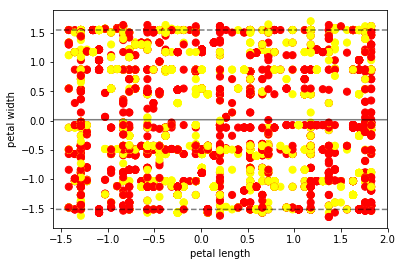

CPU times: user 1.15 s, sys: 175 ms, total: 1.32 s
Wall time: 709 ms


In [14]:
%%time
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
# print(dir(svm))
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [15]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c))
grid.fit(x, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.149294,0.029199,0.530937,0.49375,1
1,1,0.178955,0.029663,0.530937,0.49375,1
2,10,0.419261,0.030565,0.530937,0.49375,1


Accuracy: 0.536


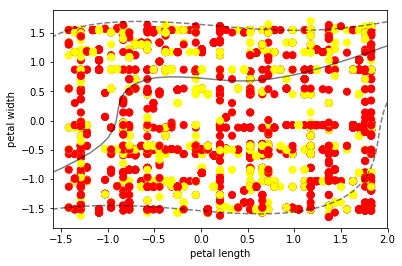

CPU times: user 1.26 s, sys: 164 ms, total: 1.43 s
Wall time: 809 ms


In [16]:
%%time
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [17]:
# grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
# grid.fit(x, y)
# grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
# grid_data.head(10)

Accuracy: 0.551


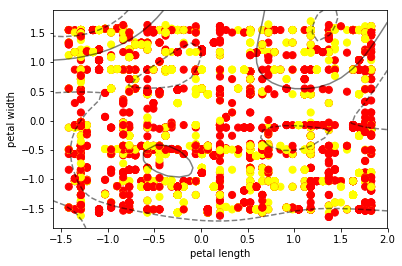

CPU times: user 1.36 s, sys: 200 ms, total: 1.56 s
Wall time: 801 ms


In [18]:
%%time
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [19]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.1,0.250140,0.076358,0.556250,0.469167,6
1,0.1,1,0.229428,0.072268,0.582292,0.451250,8
2,0.1,10,0.253246,0.068362,0.668021,0.512500,2
3,1,0.1,0.248335,0.073587,0.563958,0.449167,9
4,1,1,0.248640,0.067239,0.609271,0.475417,5
5,1,10,0.266515,0.059752,0.709479,0.511250,3
6,10,0.1,0.291404,0.070608,0.562917,0.456875,7
7,10,1,0.354521,0.065019,0.624583,0.498333,4
8,10,10,0.365416,0.052048,0.735729,0.518333,1


Accuracy: 0.452


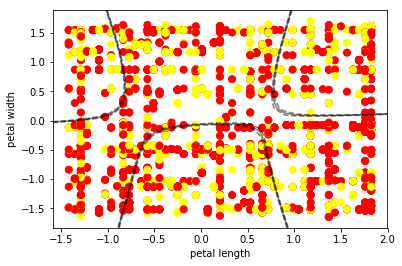

CPU times: user 1.22 s, sys: 155 ms, total: 1.38 s
Wall time: 742 ms


In [20]:
%%time
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [21]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.1,0.262652,0.076591,0.530937,0.494167,6
1,0.1,1,0.205359,0.054802,0.505625,0.514583,4
2,0.1,10,0.183285,0.064643,0.503125,0.495208,5
3,1,0.1,0.248058,0.073397,0.509896,0.517708,3
4,1,1,0.196521,0.051738,0.496042,0.522083,1
5,1,10,0.187404,0.066291,0.500938,0.483333,8
6,10,0.1,0.264602,0.046395,0.490833,0.484792,7
7,10,1,0.192123,0.051543,0.510104,0.518333,2
8,10,10,0.187415,0.065394,0.501042,0.483333,8


In [22]:
corrmatrix = df.corr()
corrmatrix.head()

,Sex,Age,Height,Weight,Team,Sport,Medal
Sex,1.000000,0.120544,0.544310,0.547660,-0.005524,-0.006184,0.006285
Age,0.120544,1.000000,0.126089,0.167862,0.003231,-0.081850,-0.003527
Height,0.544310,0.126089,1.000000,0.785515,-0.007816,0.055902,-0.032230
Weight,0.547660,0.167862,0.785515,1.000000,-0.001365,0.072756,-0.033834
Team,-0.005524,0.003231,-0.007816,-0.001365,1.000000,-0.009734,0.002188


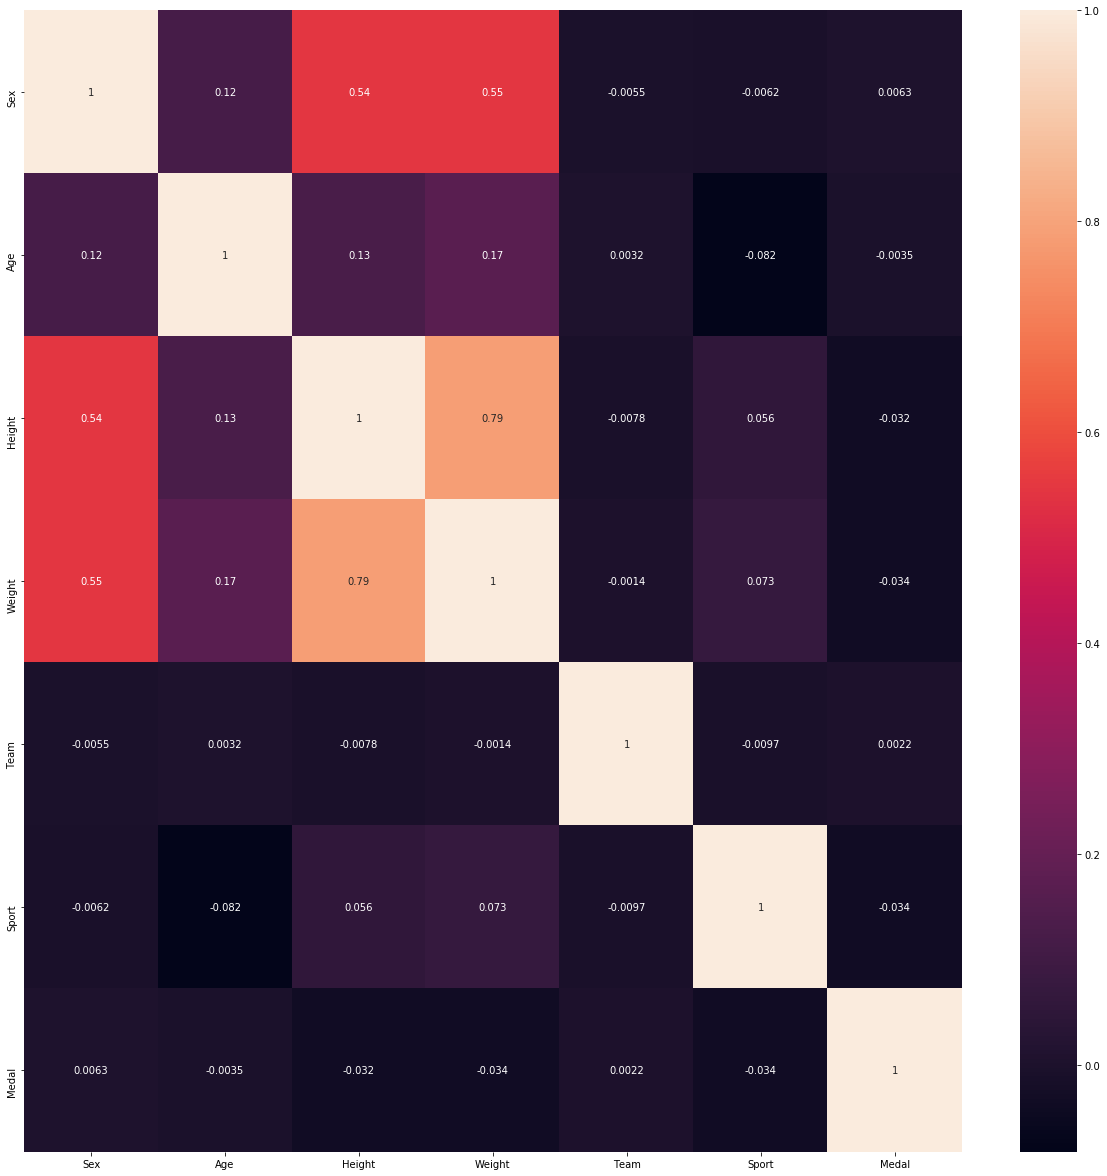

In [23]:
f = plt.subplots(figsize=(21,21))
sb.heatmap(corrmatrix, annot=True)

In [24]:
x = df[['Weight']].values
y = df['Sex'].values

print(x[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

[[-0.72763871]
 [-1.12091655]
 [-1.12091655]
 [-0.00662934]
 [ 0.58328742]
 [-0.79318502]
 [-0.33436087]
 [-0.33436087]
 [-0.07217564]
 [-1.18646286]]
[ 0.88354824 -1.13180012 -1.13180012  0.88354824  0.88354824 -1.13180012
  0.88354824  0.88354824  0.88354824 -1.13180012]


In [25]:
%%time
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.251
CPU times: user 26.2 s, sys: 251 ms, total: 26.5 s
Wall time: 26.6 s


In [26]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.025601,0.004253,0.990018,0.990016,1
1,1,0.021417,0.003997,0.990017,0.990015,2
2,10,0.022053,0.003898,0.990017,0.990015,2


In [27]:
%%time
svm = SVR(kernel='poly')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: -0.613
CPU times: user 43.9 s, sys: 311 ms, total: 44.3 s
Wall time: 44.5 s


In [28]:
# grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
# grid.fit(x_std, y)
# grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
# grid_data.head(10)

In [29]:
%%time
svm = SVR(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.264
CPU times: user 28.4 s, sys: 191 ms, total: 28.6 s
Wall time: 28.6 s


In [30]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.1,1.168443,0.227724,0.997182,0.996923,3
1,0.1,1,4.220759,1.087315,0.992231,0.986425,6
2,0.1,10,72.306591,9.662087,0.694209,0.481554,9
3,1,0.1,0.698134,0.074287,0.997361,0.997174,2
4,1,1,6.023430,0.704552,0.997000,0.992418,5
5,1,10,177.203417,7.027604,0.990825,0.780727,8
6,10,0.1,0.681202,0.068124,0.997386,0.997198,1
7,10,1,5.992749,0.702653,0.997000,0.992419,4
8,10,10,178.513999,7.077957,0.990929,0.780848,7


In [31]:
%%time
svm = SVR(kernel='sigmoid')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: -2734891.167
CPU times: user 48.7 s, sys: 280 ms, total: 48.9 s
Wall time: 49 s


In [32]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.1,0.1,52.076638,13.136202,-2.161707e+02,-2.116710e+02,1
1,0.1,1,53.591939,15.789697,-8.186387e+04,-8.055582e+04,3
2,0.1,10,45.549231,15.397044,-1.502498e+05,-1.459721e+05,4
3,1,0.1,52.745489,12.352550,-2.155510e+04,-2.076870e+04,2
4,1,1,51.307958,15.181088,-8.189403e+06,-8.057392e+06,6
5,1,10,39.831266,14.786458,-1.502246e+07,-1.459266e+07,7
6,10,0.1,48.884640,11.859543,-2.154942e+06,-2.076395e+06,5
7,10,1,61.769889,15.442802,-8.027900e+08,-7.908940e+08,8
8,10,10,39.738991,14.668786,-1.502010e+09,-1.459142e+09,9


In [33]:
x = df.iloc[:, :-1]
y = df['Medal'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [34]:
%%time
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 0.856
CPU times: user 6.53 s, sys: 302 ms, total: 6.83 s
Wall time: 6.84 s


In [35]:
%%time
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: -0.000
CPU times: user 9.87 s, sys: 134 ms, total: 10 s
Wall time: 10 s
